In [31]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras import layers , models , regularizers , optimizers
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import Input , Activation , Add
from keras.regularizers import l2
from keras.optimizers import Adam , Adagrad , Adadelta , Adamax , RMSprop


In [32]:
fldr="./UTkFace"

In [33]:
import os
files=os.listdir(fldr)

In [34]:
ages=[]
images=[]
genders=[]
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

In [35]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

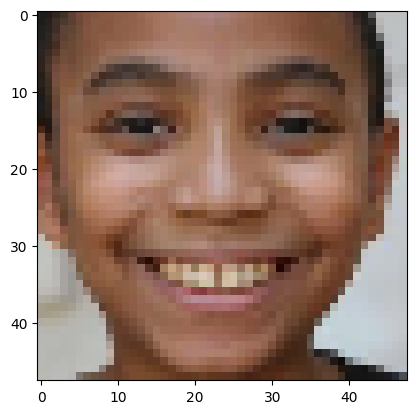

In [36]:
plt.imshow(images[87])

In [37]:
print(ages[87])

10


In [38]:
print(genders[87])

0


In [39]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)


In [40]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [41]:
values , counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


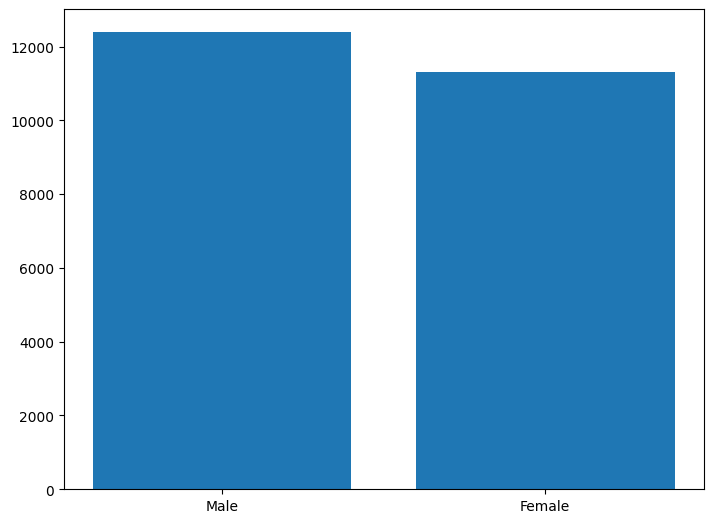

In [42]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=["Male","Female"]
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [43]:
values , counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [44]:
val=values.tolist()
cnt=counts.tolist()

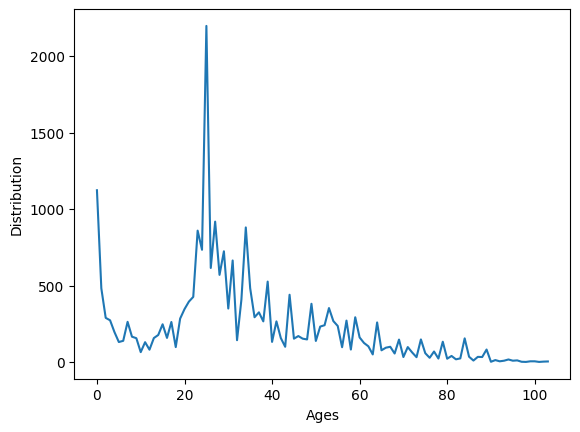

In [45]:
plt.plot(counts)
plt.xlabel("Ages")
plt.ylabel("Distribution")
plt.show()

In [46]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [47]:
images_f_2=images_f/255

In [48]:
images_f_2.shape

(23708, 48, 48, 3)

In [49]:
labels_f=np.array(labels)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train , X_test , Y_train , Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [52]:
Y_train[0:5]

array([[ 1,  1],
       [ 8,  1],
       [39,  1],
       [42,  0],
       [26,  0]])

In [53]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [54]:
Y_train_2[0][0:5]

array([1, 1, 1, 0, 0])

In [55]:
Y_train_2[1][0:5]

array([ 1,  8, 39, 42, 26])

In [56]:
def Convolution(input_tensor, filters):
    x=Conv2D(filters = filters, kernel_size=(3,3),padding="same", strides=(1,1), kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout (0.1)(x)
    x=Activation('relu')(x)
    return x

In [57]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs, 32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64, activation='relu') (flatten)
    dense_2=Dense(64, activation='relu') (flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid', name='sex_out') (drop_1)
    output_2=Dense(1,activation='relu', name='age_out')(drop_2)
    model=Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam", metrics=["accuracy"])
    return model

In [58]:
Model=model((48,48,3))

In [59]:
Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 48, 48, 32)   896         ['input_2[0][0]']                
                                                                                                  
 dropout_6 (Dropout)            (None, 48, 48, 32)   0           ['conv2d_4[0][0]']               
                                                                                                  
 activation_4 (Activation)      (None, 48, 48, 32)   0           ['dropout_6[0][0]']              
                                                                                            

In [60]:
from keras.callbacks import ModelCheckpoint

In [61]:
fle_s='agegender.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [62]:
history=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.8010 - sex_out_loss: 0.6861 - age_out_loss: 15.9319 - sex_out_accuracy: 0.5681 - age_out_accuracy: 0.0476
Epoch 1: val_loss improved from inf to 17.79996, saving model to agegender.h5
278/278 [==============================] - 210s 725ms/step - loss: 16.8010 - sex_out_loss: 0.6861 - age_out_loss: 15.9319 - sex_out_accuracy: 0.5681 - age_out_accuracy: 0.0476 - val_loss: 17.8000 - val_sex_out_loss: 0.6503 - val_age_out_loss: 16.9742 - val_sex_out_accuracy: 0.6329 - val_age_out_accuracy: 0.0459
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.5926 - sex_out_loss: 0.5949 - age_out_loss: 12.7840 - sex_out_accuracy: 0.6903 - age_out_accuracy: 0.0466
Epoch 2: val_loss improved from 17.79996 to 14.24369, saving model to agegender.h5
278/278 [==============================] - 270s 969ms/step - loss: 13.5926 - sex_out_loss: 0.5949 - age_out_loss: 12.7840 - sex_out_accuracy: 0.6903 - age_out_accurac

In [63]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 16s 82ms/step - loss: 7.4420 - sex_out_loss: 0.2659 - age_out_loss: 6.5250 - sex_out_accuracy: 0.8831 - age_out_accuracy: 0.0459


[7.442015171051025,
 0.26592573523521423,
 6.524960041046143,
 0.8830774426460266,
 0.04589168354868889]

In [64]:
pred=Model.predict(X_test)

186/186 [==============================] - 13s 63ms/step


In [65]:
pred[1]

array([[36.437706],
       [ 8.189331],
       [64.81052 ],
       ...,
       [21.752361],
       [ 1.600506],
       [26.570328]], dtype=float32)

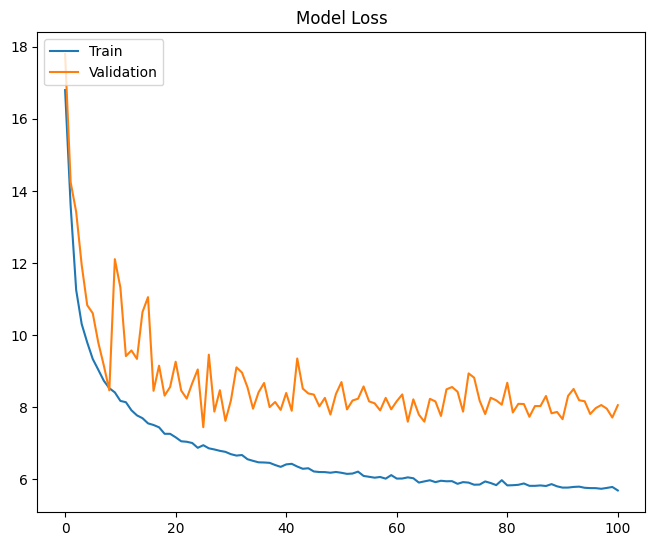

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

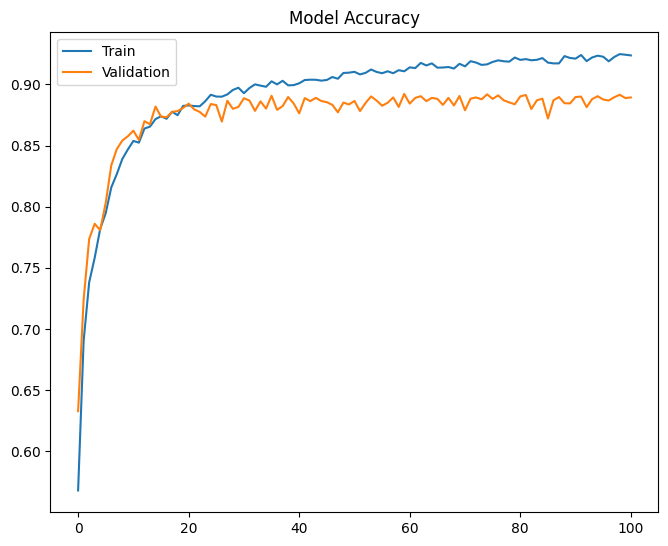

In [67]:
plt.plot(history.history['sex_out_accuracy'])
plt.plot(history.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=("Epoch")
plt.ylabel=('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

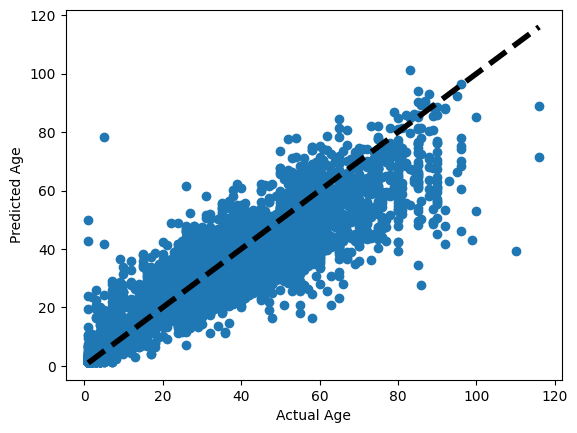

In [68]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(),Y_test_2[1].max()], 'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [70]:
i=0
Pred_1=[]
while(i<len(pred[0])):
    Pred_1.append(int(np.round(pred[0][i])))
    i=i+1

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [72]:
report=classification_report(Y_test_2[0],Pred_1)

In [73]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3069
           1       0.84      0.93      0.88      2858

    accuracy                           0.88      5927
   macro avg       0.89      0.88      0.88      5927
weighted avg       0.89      0.88      0.88      5927



In [74]:
results=confusion_matrix(Y_test_2[0],Pred_1)

<AxesSubplot:>

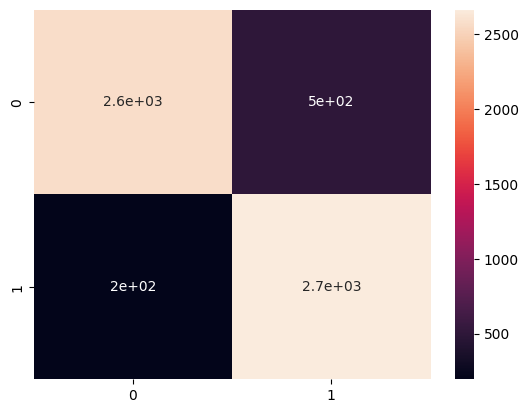

In [75]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [76]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 [==============================] - 0s 362ms/step
Predicted Age is 96
Predicted Gender is Female


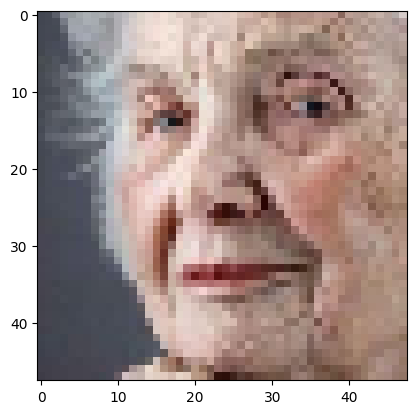

In [77]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 75ms/step
Predicted Age is 22
Predicted Gender is Male


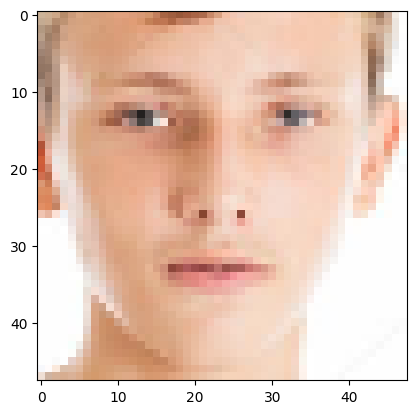

In [85]:
test_image(25,images_f,images_f_2,Model)

1/1 [==============================] - 0s 180ms/step
Predicted Age is 17
Predicted Gender is Female


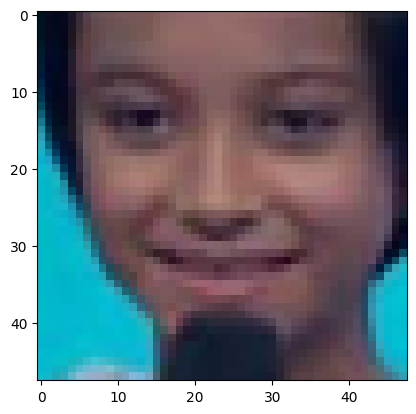

In [86]:
test_image(168,images_f,images_f_2,Model)

1/1 [==============================] - 0s 210ms/step
Predicted Age is 22
Predicted Gender is Male


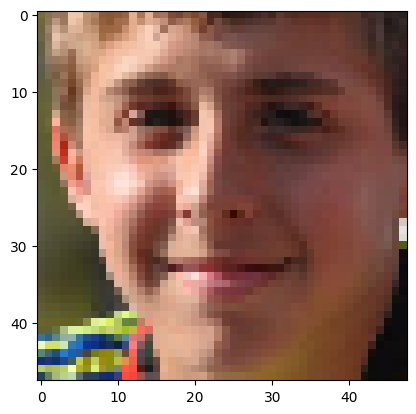

In [87]:
test_image(888,images_f,images_f_2,Model)

1/1 [==============================] - 0s 142ms/step
Predicted Age is 24
Predicted Gender is Female


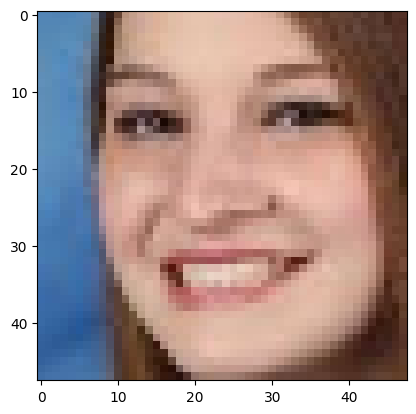

In [88]:
test_image(1288,images_f,images_f_2,Model)

1/1 [==============================] - 0s 56ms/step
Predicted Age is 1
Predicted Gender is Female


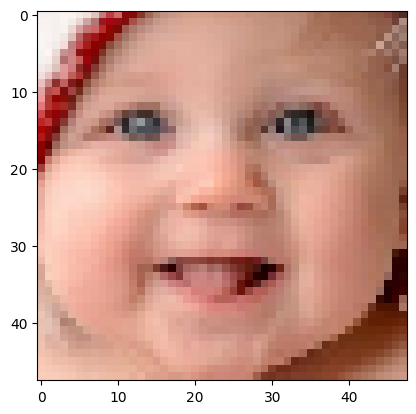

In [90]:
test_image(2300,images_f,images_f_2,Model)